# Project: Medical Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Why do patients not keep their appointments?** An individual makes a doctor appointment, receives all the instructions and doesnt show up for the appointment. **Who or what do we attribute the blame to?** This project analyses the possible reasons of patients not showing up for their medical appointments 

#### Data Features
* The dataset which contains medical informations collected in Brazil has 110,527 medical appointments with 14 associated variables
* The dataset for this project was obtained from the website https://www.kaggle.com/datasets/joniarroba/noshowappointments. 

#### Data Dictionary
1. **PatientId** - Identification of a patient
2. **AppointmentID** - Identification of each appointment
3. **Gender** - Male or Female
4. **ScheduledDay** - The day of the actuall appointment, when they have to visit the doctor.
5. **AppointmentDay** - The day someone called or registered the appointment, this is before appointment of course.
6. **Age** - How old is the patient.
7. **Neighbourhood** - Where the appointment takes place.
8. **Scholarship** - True(1) or False(0) . Observation, this is a broad topic, for more information read https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
9. **Hypertension** - True(1) or False(0)
10. **Diabetes** - True(1) or False(0)
11. **Alcoholism** - True(1) or False(0)
12. **Handicap** - True or False
13. **SMS_received** - 1 or more messages sent to the patient.
14. **No-show** - True(Yes) or False(No).


## Preparing the tools needed for analysis

In [99]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

#sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [100]:
# Load the data
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head() #data preview

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the preview of the dataset, some issues include
* ScheduledDay and AppointmentDay columns contains data which is a mixture date and strings
* Hipertension and Handcap column labels are wrongly spelt
* SMS_recieved and No_show column labels have a different naming convention from the remaining column labels

In [101]:
df.shape

(110527, 14)

It is observed that the dataset has 110527 observations and 14 attributes

In [102]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the result above,
* The 'Age' column has a minimum value of -1 which should be impossible as age cannot have a negative value.
* Over 75% of the persons are above the age of 18

In [103]:
#summary information about the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###### Checking for missing or duplicated data

In [104]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [105]:
df.duplicated().sum()

0

There are no missing or duplicated values in the dataset. 

In [106]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning

#### Renaming Columns

In [107]:
# Renaming some of the columns for correctness and uniformity
df.rename(columns = {"Hipertension": "Hypertension", "Handcap" : "Handicap",
                     "SMS_received": "SMSReceived", "No-show": "NoShow"},
                     inplace = True)

#### Cleaning up the Date Columns

In [108]:
## Removing the strings attached to the ScheduledDay column and converting it to a date datatype
df["ScheduledDay"] = df["ScheduledDay"].replace(['T','Z'] ,[' ', ' '] , regex = True)
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]).dt.date

In [109]:
## Removing the strings attached to the AppointmentDay column and converting it to a date datatype
df["AppointmentDay"] = df["AppointmentDay"].replace(['T','Z'] ,[' ', ' '] , regex = True)
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [110]:
## Preview the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Dropping unnecessary columns

> The PatientId Column and AppointmentID columns are not important in the analysis. Therefore we will be dropping them from
the dataset

In [111]:
## Dropping the columns
df.drop(["PatientId", "AppointmentID"], axis = 1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Handling impossible values in the Age Column

The Age column contains negative value of -1. This is impossible since age cannot have a negative value.

In [112]:
(df["Age"] < 0).sum()

1

There is only one observation with a negative value for age

In [113]:
#Removing observation with negative age value
df = df.query('Age >= 0')
df["Age"].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


In [114]:
# Function that cross tabulates an independent features and the dependent feature(NoShow)
def crosstab_features(feature, normalize = None):
    """
    Function returns the cross tabulation of one independent feature 
    and the dependent variable.
    """
    if normalize == None:
        return pd.crosstab(df[feature], df["NoShow"])
    elif normalize == "index":
        return pd.crosstab(df[feature], df["NoShow"], normalize = "index")
    elif normalize == "column":
        return pd.crosstab(df[feature], df["NoShow"], normalize = "column")
    else:
        raise Exception("Wrong input for normalization")

## How many people showed up for their appointments?

In [115]:
df["NoShow"].value_counts()

No     88207
Yes    22319
Name: NoShow, dtype: int64

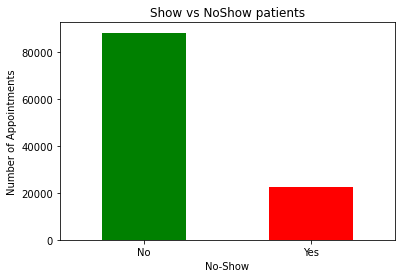

In [116]:
df["NoShow"].value_counts().plot.bar(color = ["green", "red"],);
plt.title("Show vs NoShow patients");
plt.ylabel("Number of Appointments");
plt.xlabel("No-Show");
plt.xticks(rotation = 0);

In [117]:
df["NoShow"].value_counts(normalize = True)

No     0.798066
Yes    0.201934
Name: NoShow, dtype: float64

From the output above, we see that out of 110,526 patients who scheduled appointments, 88207(over 79.8%) patients showed up 
while 22319(about 20.2%) patients did not show up.

### Is there a disparity in showing up of appointments between males and females

In [118]:
df["Gender"].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

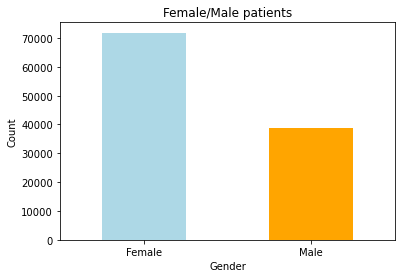

In [119]:
df["Gender"].value_counts().plot(kind="bar",
                                color = ["lightblue", "orange"])
plt.title("Female/Male patients");
plt.ylabel("Count");
plt.xlabel("Gender");
labels = ["Female", "Male"]
plt.xticks(ticks = [0,1], labels = labels, rotation=0);

In [120]:
crosstab_features("Gender")

NoShow,No,Yes
Gender,,
F,57245,14594
M,30962,7725


Females make up about 65% of the dataset while males account for the remaining 35%. This shows females that pay more attention to
their health than their male counterparts

In [121]:
crosstab_features("Gender", "index")

NoShow,No,Yes
Gender,,
F,0.796851,0.203149
M,0.800321,0.199679


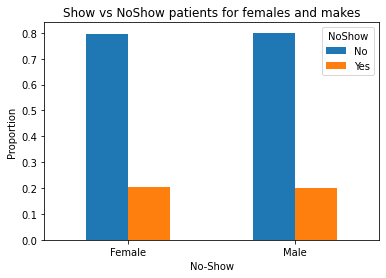

In [122]:
crosstab_features("Gender", "index").plot.bar()
plt.title("Show vs NoShow patients for females and makes");
plt.ylabel("Proportion");
plt.xlabel("No-Show");
labels = ["Female", "Male"]
plt.xticks(ticks = [0,1], labels = labels, rotation=0);

From the diagram above, we observe that there isnt much disparity among the genders in showing up for their appointments

### Is there a day of the week that records high level of compliance of patients with respect to their appointments?

In order to achieve this, we need to extract the day of the week from the appointment column

In [123]:
# Extracting the day of the week
df["DayOfWeek"] = df["AppointmentDay"].dt.day_name()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DayOfWeek
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [124]:
df["DayOfWeek"].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: DayOfWeek, dtype: int64

From the output above, Tuesday and Wednesday records the highest number of fixed date for 
appointment, Saturday records the lowest number of appointments and there are no appointments 
on Sunday

In [125]:
crosstab_features("DayOfWeek", "index")

NoShow,No,Yes
DayOfWeek,,
Friday,0.787739,0.212261
Monday,0.793519,0.206481
Saturday,0.769231,0.230769
Thursday,0.806459,0.193541
Tuesday,0.799064,0.200936
Wednesday,0.803108,0.196892


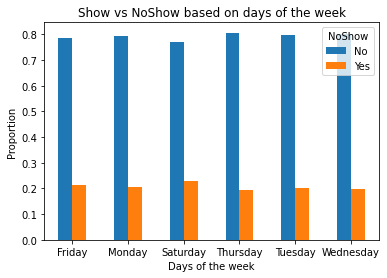

In [126]:
crosstab_features("DayOfWeek", "index").plot(kind = "bar")
plt.title("Show vs NoShow based on days of the week");
plt.ylabel("Proportion");
plt.xlabel("Days of the week");
plt.xticks(rotation=0);

 Although the difference among the proportions in the days of the week is minimal. Among the days of the week(excluding Saturday which had only 39 appointments), Thursday followed by wednesday recorded the highest proportion of patients that showed up for their appointments.

### Do patients belonging to specific age groups show up to appointments more than others?

# Plotting the age distribution

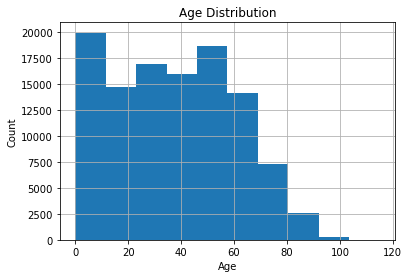

In [146]:
#Plotting the age distribution
df["Age"].hist()
plt.title("Age Distribution");
plt.xlabel("Age");
plt.ylabel("Count");

In [128]:
# Creating different groups for the ages
bins = [0,2,4,13,20,64,115]
labels = ["Infant","Toddler", "Kid","Teen","Adult","Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels, right = False)

<AxesSubplot:xlabel='AgeGroup'>

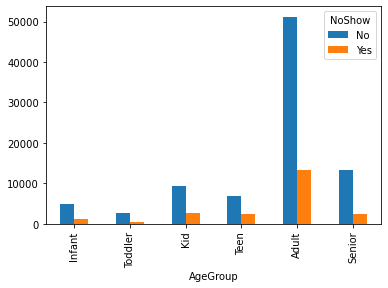

In [129]:
crosstab_features("AgeGroup").plot.bar()

Adults between the ages of 20 and 64 constitute the larger part of the entire dataset

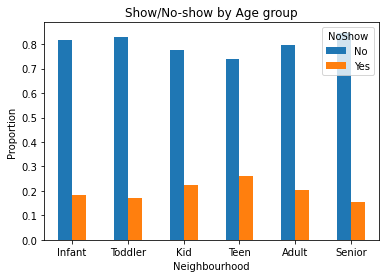

In [130]:
crosstab_features("AgeGroup", "index").plot.bar()
plt.title("Show/No-show by Age group");
plt.ylabel("Proportion");
plt.xlabel("Neighbourhood");
plt.xticks(rotation = 0);

From the diagram above, it is observed that seniors and toddlers have the highest tendency to show up for their appointments while teenagers have the lowest

### Does hospital in specific location record higher percentages of patients showing up for appointments

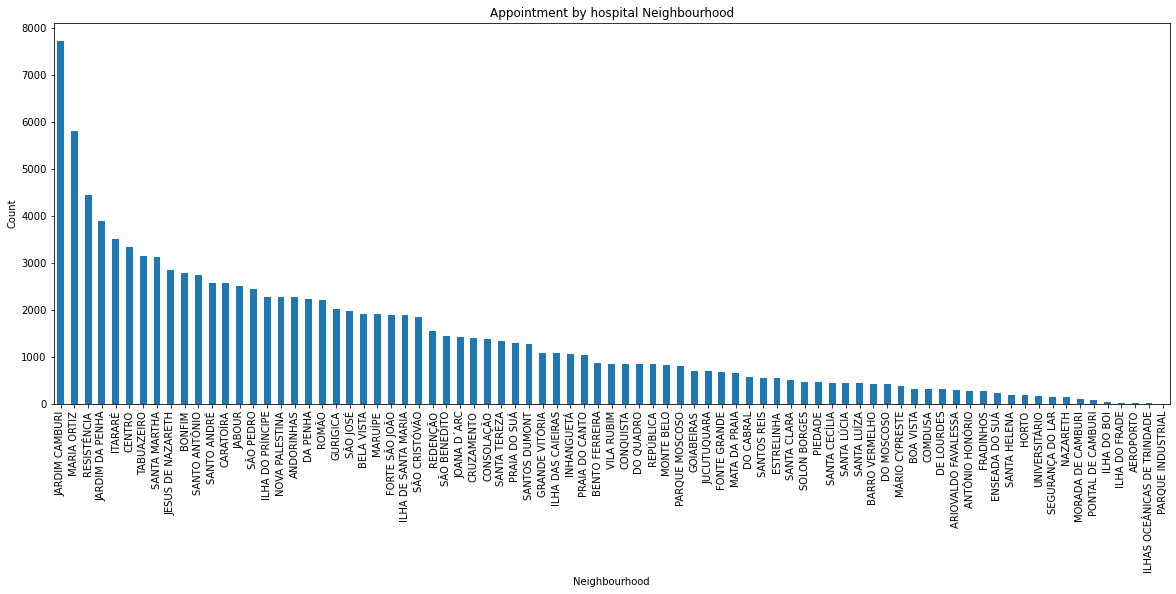

In [131]:
df["Neighbourhood"].value_counts().plot(kind = 'bar', figsize = (20,7))
plt.title("Appointment by hospital Neighbourhood");
plt.ylabel("Count");
plt.xlabel("Neighbourhood");

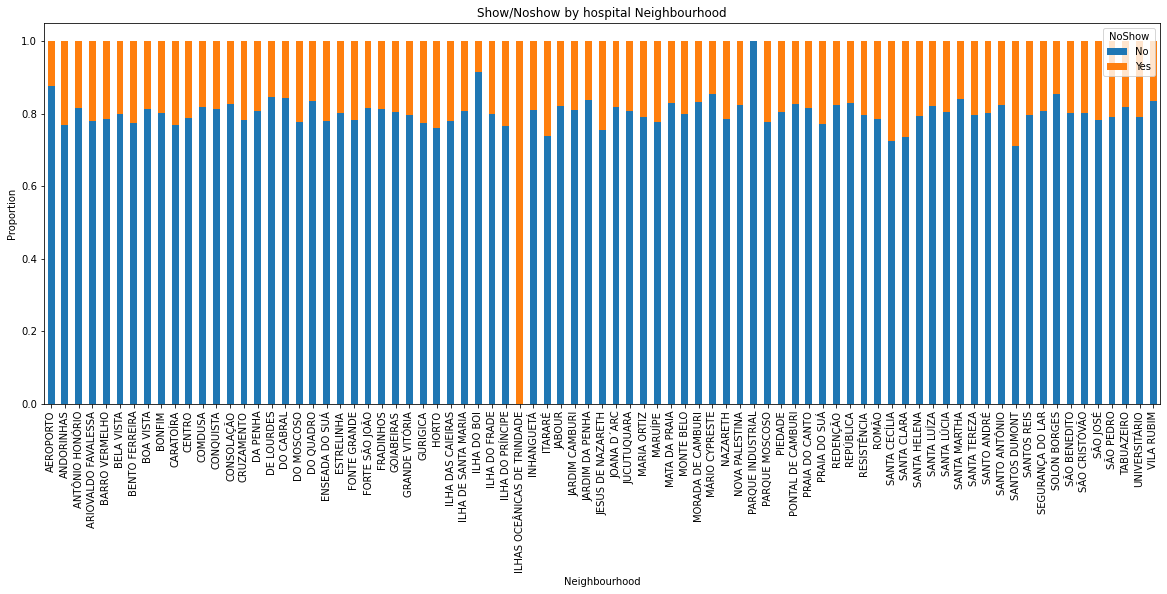

In [132]:
crosstab_features("Neighbourhood", "index").plot(kind = "bar", figsize= (20,7), stacked = True)
plt.title("Show/Noshow by hospital Neighbourhood");
plt.ylabel("Proportion");
plt.xlabel("Neighbourhood");

Almost all  the hospital neigbourhoods have show-up percentages of over 80%

### Does governtment welfare encourage patients to show up for their appointments

In [133]:
crosstab_features("Scholarship")

NoShow,No,Yes
Scholarship,,
0,79924,19741
1,8283,2578


In [134]:
crosstab_features("Scholarship", "index")

NoShow,No,Yes
Scholarship,,
0,0.801926,0.198074
1,0.762637,0.237363


According to the table above, 76% of individuals on some form of government welfare show up for their appointment while 80% of inividuals without government welfare show up for their appointments

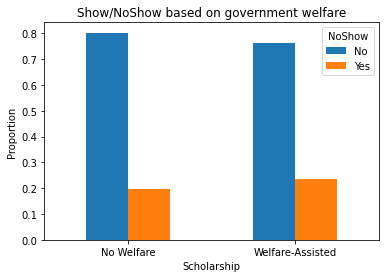

In [135]:
crosstab_features("Scholarship", "index").plot.bar()
plt.title("Show/NoShow based on government welfare");
plt.ylabel("Proportion");
plt.xlabel("Scholarship");
labels = ["No Welfare", "Welfare-Assisted"]
plt.xticks(ticks = [0,1], labels = labels, rotation=0);

The above diagram indicates that patients who are not assited by government welfare scheme show up more
for their appointment that those who receive some form of welfare assistance.

### Are patients diagnosed with hypertension more motivated to honor their appointments?

In [136]:
crosstab_features("Hypertension")

NoShow,No,Yes
Hypertension,,
0,70178,18547
1,18029,3772


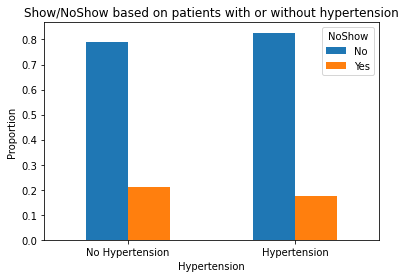

In [137]:
crosstab_features("Hypertension", "index").plot.bar()
plt.title("Show/NoShow based on patients with or without hypertension");
plt.ylabel("Proportion");
plt.xlabel("Hypertension");
labels = ["No Hypertension", "Hypertension"]
plt.xticks(ticks = [0,1], labels = labels, rotation=0);

The above diagram indicates that patients diagnosed with hypertension show up for their appointments 
than those who arent diagnosed with hypertension.

### Are patients diagnosed with diabetes more motivated to honor their appointments?

In [138]:
crosstab_features("Diabetes")

NoShow,No,Yes
Diabetes,,
0,81694,20889
1,6513,1430


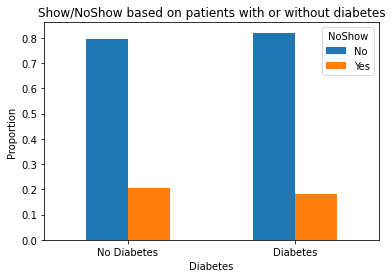

In [139]:
crosstab_features("Diabetes", "index").plot.bar()
plt.title("Show/NoShow based on patients with or without diabetes");
plt.ylabel("Proportion");
plt.xlabel("Diabetes");
labels = ["No Diabetes", "Diabetes"]
plt.xticks(ticks = [0,1], labels = labels, rotation=0);

The above diagram indicates that patients diagnosed with diabetes show up for their appointments 
than those who arent diagnosed with diabetes.

### Are alcoholic patients more likely to show up to their appointments?

In [140]:
crosstab_features("Alcoholism")

NoShow,No,Yes
Alcoholism,,
0,85524,21642
1,2683,677


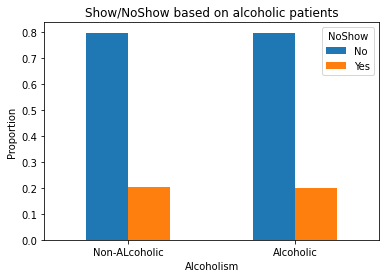

In [141]:
crosstab_features("Alcoholism", "index").plot.bar()
plt.title("Show/NoShow based on alcoholic patients");
plt.ylabel("Proportion");
plt.xlabel("Alcoholism");
labels = ["Non-ALcoholic", "Alcoholic"]
plt.xticks(ticks = [0,1], labels = labels, rotation=0);

From the diagram,we observe there isnt any difference in proportion of 
showing up for appointments for both alcoholic and non-alcoholic patients

### Are physically challenged individuals more likely to honor their appointments?

In [142]:
crosstab_features("Handicap")

NoShow,No,Yes
Handicap,,
0,86373,21912
1,1676,366
2,146,37
3,10,3
4,2,1


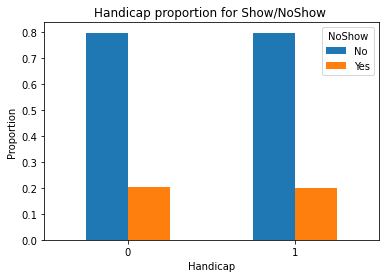

In [143]:
crosstab_features("Alcoholism", "index").plot.bar()
plt.title("Handicap proportion for Show/NoShow ");
plt.ylabel("Proportion");
plt.xlabel("Handicap");
plt.xticks(rotation=0);

We notice the difference in the rate of showing up for appointments among the different categories of the physically-challenged(Handicapped)

### Does SMS reminders help patients visit the doctor at the appointed date?

In [144]:
crosstab_features("SMSReceived")

NoShow,No,Yes
SMSReceived,,
0,62509,12535
1,25698,9784


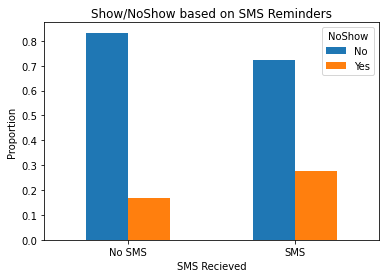

In [145]:
crosstab_features("SMSReceived","index").plot.bar()
plt.title("Show/NoShow based on SMS Reminders");
plt.ylabel("Proportion");
plt.xlabel("SMS Recieved");
labels = ["No SMS", "SMS"]
plt.xticks(ticks = [0,1], labels = labels, rotation=0);

From the diagram above, it is oddly observed that patients with sms reminders recorded a lower percentage rate 
of showing up for their appointments. This poses a problem as SMS reminders is supposed to be a potential solution
or factor to reducing patient no-show attitude to appointments.

<a id='conclusions'></a>
## Conclusions

### Results

* Out of 110,526 patients who scheduled appointments, 88207(over 79.8%) patients showed up while 22319(about 20.2%) patients did not show up.
* Females make up about 65% of the dataset while males account for the remaining 35%.
* There isnt much disparity among the genders in showing up for appointments.
* Tuesday and Wednesday records the highest number of fixed date for appointment, Saturday records the lowest number of appointments and there are no appointments on Sunday.
* Seniors(ages 20 to 64) and toddlers(ages 2 to 4) have the highest tendency to show up for their appointments while teenagers(ages 13 to 20) have the lowest.
* Individuals with goverment welfare(scholarship) seem to actually show up less than those without welfare.
* Patients diagnosed with hypertension show up for their appointments than those who arent diagnosed with hypertension.
* Patients diagnosed with diabetes show up for their appointments than those who arent diagnosed with diabetes.
* There is some difference in the rate of showing up for appointments among the different categories of the physically-challenged(Handicapped).
* SMS Reminders are not very effective in getting patients to show up for their appointments. 


### Limitations

* The entire dataset is a subset of the population and may possess some form of bias which may affect the inference from the analysis.
* Most of the variables are categorical,this hinders some bivariate and multivariate analysis that could have provided more insights.
* There are some findings that seem counter-intuitive. The SMS reminders was expected to show increase in patients showing up for their appointments but reverse was the case. 